### Out Migrator Median Rent & Mortgage
*Does not apply PERWT

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [3]:
#Removing records containing missing rent or mortgage values, which were assigned the value 0
outmigrators_rent = outmigrators[(outmigrators.RENT != 0)]
outmigrators_mort = outmigrators[(outmigrators.MORTAMT1 != 0)]

---

#### (1) Rent:

In [4]:
ind_outmigrators_rent = {}
for year in range(2006, 2018):
    df = outmigrators_rent[outmigrators_rent.YEAR == year]
    rent = df.RENT.median()
    ind_outmigrators_rent[year] = rent

In [5]:
ind_outmigrators_rent

{2006: 950.0,
 2007: 1000.0,
 2008: 1100.0,
 2009: 1100.0,
 2010: 1000.0,
 2011: 1100.0,
 2012: 1100.0,
 2013: 1200.0,
 2014: 1200.0,
 2015: 1200.0,
 2016: 1300.0,
 2017: 1400.0}

In [6]:
out_ind_rent_df = pd.DataFrame.from_dict(ind_outmigrators_rent, orient='index')
out_ind_rent_df = out_ind_rent_df.reset_index().rename({'index':'Year', 0:'Med_Rent'}, axis=1)

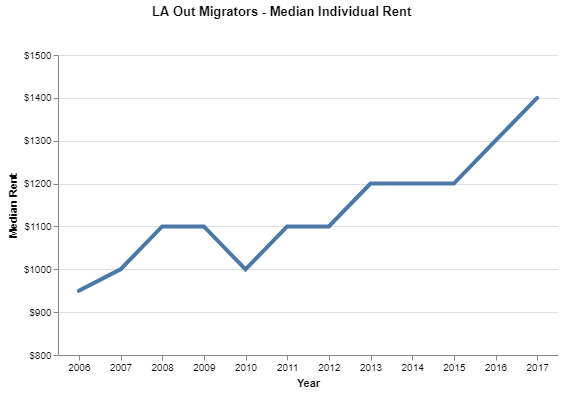

In [7]:
#Plotting w/ Altair
title=alt.TitleParams(text='LA Out Migrators - Median Individual Rent', offset=30, anchor='middle')

indiv_rent = alt.Chart(out_ind_rent_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            axis=alt.Axis(grid=False), 
            title='Year'),
    y=alt.Y('Med_Rent', 
            scale=alt.Scale(domain=[800, 1500]), 
            axis=alt.Axis(format='$f'), 
            title='Median Rent')
).properties(title=title, 
             width=500, 
             background='white'
).configure_view(strokeWidth=0)

indiv_rent

In [8]:
indiv_rent.save('out_med_inc_no_perwt.png', scale_factor=3)

----------

#### (2) Mortgage:

In [9]:
ind_outmigrators_mort = {}
for year in range(2006, 2018):
    df = outmigrators_mort[outmigrators_mort.YEAR == year]
    mort = df.MORTAMT1.median()
    ind_outmigrators_mort[year] = mort

In [10]:
ind_outmigrators_mort

{2006: 1700.0,
 2007: 1800.0,
 2008: 1600.0,
 2009: 1600.0,
 2010: 1500.0,
 2011: 1600.0,
 2012: 1500.0,
 2013: 1500.0,
 2014: 1600.0,
 2015: 1600.0,
 2016: 1700.0,
 2017: 1850.0}

In [11]:
out_ind_mort_df = pd.DataFrame.from_dict(ind_outmigrators_mort, orient='index')
out_ind_mort_df = out_ind_mort_df.reset_index().rename({'index':'Year', 0:'Med_Mort'}, axis=1)

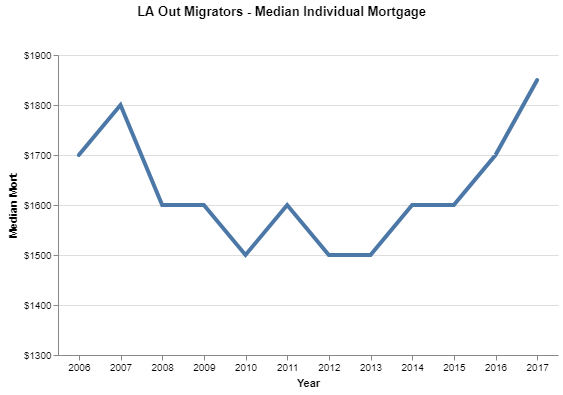

In [12]:
#Plotting w/ Altair
title=alt.TitleParams(text='LA Out Migrators - Median Individual Mortgage', offset=30, anchor='middle')

indiv_mort = alt.Chart(out_ind_mort_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            axis=alt.Axis(grid=False), 
            title='Year'),
    y=alt.Y('Med_Mort', 
            scale=alt.Scale(domain=[1300, 1900]), 
            axis=alt.Axis(format='$f'), 
            title='Median Mort')
).properties(title=title, 
             width=500, 
             background='white'
).configure_view(strokeWidth=0)

indiv_mort

----------

### Out Migrator Rent % of Income (Individual & Family)
*Does not apply PERWT

In [13]:
indiv_inc = outmigrators_rent[(outmigrators_rent.INCTOT != 9999999)]
fam_inc = outmigrators_rent[(outmigrators_rent.FTOTINC != 9999999)]

#### (1) Individual Income:

In [14]:
ind_outmigrators_inc = {}
for year in range(2006, 2018):
    df = indiv_inc[indiv_inc.YEAR == year]
    income = df.INCTOT.median()
    ind_outmigrators_inc[year] = income

In [15]:
ind_outmigrators_inc

{2006: 15000.0,
 2007: 20100.0,
 2008: 20000.0,
 2009: 18000.0,
 2010: 15800.0,
 2011: 15600.0,
 2012: 17200.0,
 2013: 18250.0,
 2014: 18500.0,
 2015: 20000.0,
 2016: 21000.0,
 2017: 23500.0}

*Note: The additional filtering out of missing rent values caused these individual income values to be higher than those in other charts

In [16]:
indiv_inc_rent = out_ind_rent_df.copy()
indiv_inc_rent['Med_Annual_Income'] = ind_outmigrators_inc.values()
indiv_inc_rent['Ratio'] = indiv_inc_rent.Med_Rent / (indiv_inc_rent.Med_Annual_Income / 12)  #Dividing by 12 to calculate ratio based on monthly income
indiv_inc_rent

,Year,Med_Rent,Med_Annual_Income,Ratio
0,2006,950.0,15000.0,0.760000
1,2007,1000.0,20100.0,0.597015
2,2008,1100.0,20000.0,0.660000
3,2009,1100.0,18000.0,0.733333
4,2010,1000.0,15800.0,0.759494
5,2011,1100.0,15600.0,0.846154
6,2012,1100.0,17200.0,0.767442
7,2013,1200.0,18250.0,0.789041
8,2014,1200.0,18500.0,0.778378
9,2015,1200.0,20000.0,0.720000


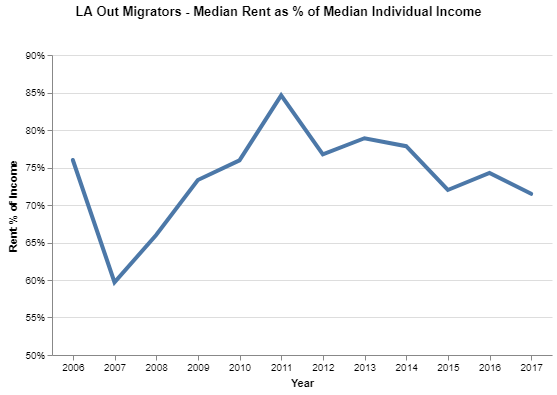

In [17]:
title=alt.TitleParams(text='LA Out Migrators - Median Rent as % of Median Individual Income', offset=30, anchor='middle')
individual = alt.Chart(indiv_inc_rent).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False, 
                          labelFlush=False)), 
    y=alt.Y('Ratio', 
            title='Rent % of Income',
            axis=alt.Axis(format='%'), 
            scale=alt.Scale(domain=[.5,.9]))
).properties(title=title, 
             width=500,
             background='white'
).configure_view(strokeWidth=0)

individual

In [18]:
individual.save('rent_perc_indiv_inc_no_perwt.png', scale_factor=3)

-----------

#### (2) Family Income:

In [19]:
fam_outmigrators_inc = {}
for year in range(2006, 2018):
    df = fam_inc[fam_inc.YEAR == year]
    income = df.FTOTINC.median()
    fam_outmigrators_inc[year] = income

In [20]:
fam_outmigrators_inc

{2006: 28000.0,
 2007: 35710.0,
 2008: 36200.0,
 2009: 38700.0,
 2010: 32500.0,
 2011: 31052.0,
 2012: 35400.0,
 2013: 39750.0,
 2014: 36000.0,
 2015: 36015.0,
 2016: 42425.0,
 2017: 42600.0}

*Note: The additional filtering out of missing rent values caused these family income values to be different than those in other charts

In [21]:
fam_inc_rent = out_ind_rent_df.copy()
fam_inc_rent['Med_Annual_Income'] = fam_outmigrators_inc.values()
fam_inc_rent['Ratio'] = fam_inc_rent.Med_Rent / (fam_inc_rent.Med_Annual_Income / 12)  #Dividing by 12 to calculate ratio based on monthly income
fam_inc_rent

,Year,Med_Rent,Med_Annual_Income,Ratio
0,2006,950.0,28000.0,0.407143
1,2007,1000.0,35710.0,0.336040
2,2008,1100.0,36200.0,0.364641
3,2009,1100.0,38700.0,0.341085
4,2010,1000.0,32500.0,0.369231
5,2011,1100.0,31052.0,0.425093
6,2012,1100.0,35400.0,0.372881
7,2013,1200.0,39750.0,0.362264
8,2014,1200.0,36000.0,0.400000
9,2015,1200.0,36015.0,0.399833


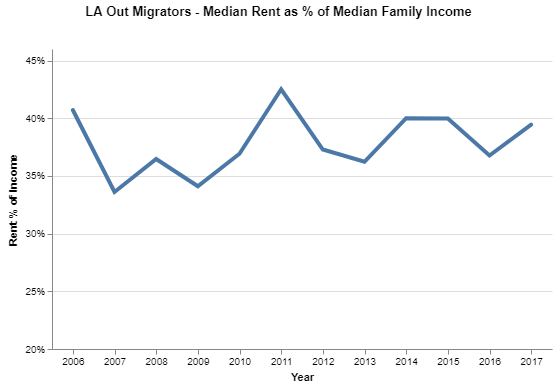

In [22]:
title=alt.TitleParams(text='LA Out Migrators - Median Rent as % of Median Family Income', offset=30, anchor='middle')
family = alt.Chart(fam_inc_rent).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False, 
                          labelFlush=False)), 
    y=alt.Y('Ratio', 
            title='Rent % of Income',
            axis=alt.Axis(format='%'), 
            scale=alt.Scale(domain=[.2,.45]))
).properties(title=title, 
             width=500,
             background='white'
).configure_view(strokeWidth=0)

family

In [23]:
family.save('rent_perc_fam_inc_no_perwt.png', scale_factor=3)